<a href="https://colab.research.google.com/github/5h33p/student_habits/blob/main/Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [67]:
# Basic Libraries
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, f_classif, VarianceThreshold

# Model Training and Testing
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
import threading

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor

# Pipeline Creation
from sklearn.pipeline import Pipeline

# Getting Data

In [68]:
# Download latest version
path = kagglehub.dataset_download("aryan208/student-habits-and-academic-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-habits-and-academic-performance-dataset


In [69]:
data = pd.read_csv(path + "/enhanced_student_habits_performance_dataset/enhanced_student_habits_performance_dataset.csv")
data.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [70]:
# data[data.notna()==False].sum() # There are no null values

print(data.columns)

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')


# Exploratory Analysis

## Heat Map

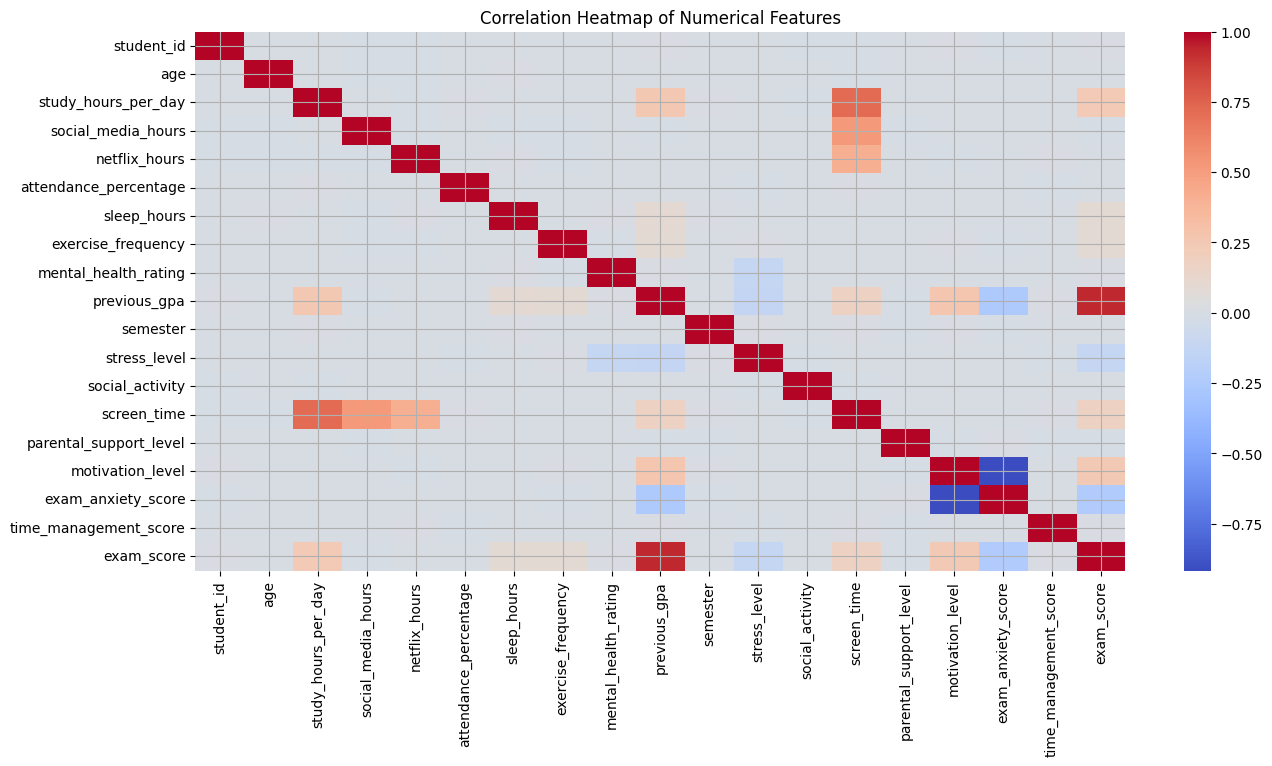

In [71]:
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.grid(True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Previous GPA

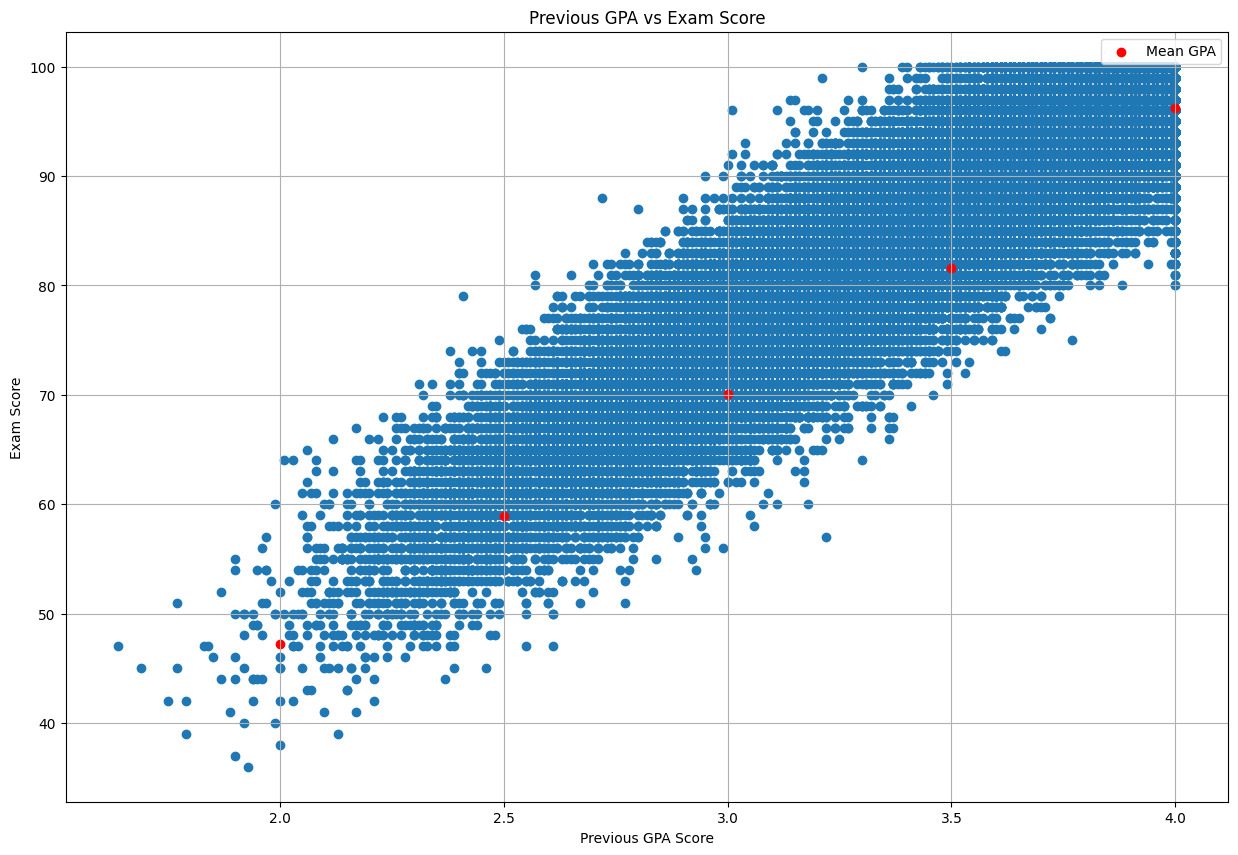

In [86]:
x_previous_gpa = [0.5 * i for i in range(9)]
y_previous_gpa = []

for x in x_previous_gpa:
  y_previous_gpa.append(data[(data.previous_gpa <= x) & (data.previous_gpa > x-0.5)].exam_score.mean())


plt.figure(figsize=(15, 10))
plt.scatter(data.previous_gpa, data.exam_score)
plt.title("Previous GPA vs Exam Score")

score_gpa = data.groupby(by='previous_gpa').previous_gpa.mean().copy()

plt.scatter(x_previous_gpa, y_previous_gpa, marker='o', color='r', label='Mean GPA')
plt.grid(True)
plt.legend()
plt.xlabel("Previous GPA")
plt.ylabel("Exam Score")
plt.show()

## Anxiety Score

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(data.exam_anxiety_score, data.exam_score)
plt.title("Exam Anxiety Score vs Exam Score")

score_anxiety = data.groupby(by='exam_anxiety_score').exam_score.mean().copy()

plt.scatter(score_anxiety.index, score_anxiety, marker='o', color='r', label='Mean Exam Score')
plt.grid(True)
plt.legend()
plt.xlabel("Exam Anxiety Score")
plt.ylabel("Exam Score")
plt.show()

## Stress Level

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(data.stress_level, data.exam_score)
plt.title("Stress Level vs Exam Score")

stress_level = data.groupby(by='stress_level').exam_score.mean().copy()

plt.scatter(stress_level.index, stress_level, marker='o', color='r', label='Stress Level')
plt.grid(True)
plt.legend()
plt.xlabel("Mean Stress Level")
plt.ylabel("Exam Score")
plt.show()

## Sleep Hours

In [ ]:
df_column = 'sleep_hours'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Screen Time

In [ ]:
df_column = 'screen_time'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Motivation Level

In [ ]:
df_column = 'motivation_level'

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Cutted Study Hours Per Day

In [ ]:
df_column = 'study_hours_per_day'

data['study_hours_per_day'] = pd.cut(data.study_hours_per_day, bins=10, labels=np.arange(10))
data['study_hours_per_day'] = data.study_hours_per_day.astype(float)

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

## Cutted Attendance Percentage

In [ ]:
df_column = 'attendance_percentage'

data.attendance_percentage = pd.cut(data.attendance_percentage, bins=11, labels=np.linspace(0, 100, 11))

plt.figure(figsize=(15, 10))
plt.scatter(data[df_column], data.exam_score)
plt.title(f"{df_column} vs Exam Score")

plot_data = data.groupby(by=df_column).exam_score.mean().copy()

plt.scatter(plot_data.index, plot_data, marker='o', color='r', label=f'Mean {df_column}')
plt.grid(True)
plt.legend()
plt.xlabel(f"{df_column}")
plt.ylabel("Exam Score")
plt.show()

# Preprocessing

## Scaling Data

In [ ]:
# data.info()

X = data.drop('exam_score', axis=1)
y = data.exam_score
data.study_hours_per_day = data.study_hours_per_day.astype(float)
categorical_data = X.loc[:, (X.dtypes=='object') | (X.dtypes=='category')] #Getting categorical data to preprocess
# print(categorical_data.nunique())

# Separeting categorical and numerical data column names

cat_columns = categorical_data.columns
num_columns = X.drop(cat_columns, axis=1).columns

# print(cat_columns, num_columns)

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_columns),
                  ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns)])

processor = preprocessor.fit(X)
# print(processor.get_feature_names_out())

X = processor.transform(X)
X = pd.DataFrame(X, columns=processor.get_feature_names_out())
X.head()

## Feature Selection

### Filter Methods

#### Information Gain

In [ ]:
most_frequent_features = pd.DataFrame()

info_gain = mutual_info_classif(X, y, random_state=8)
info_gain = pd.Series(info_gain, index=X.columns)
most_frequent_features['info_gain'] = info_gain.sort_values(ascending=False)[:10].index

Feature | Score
--|--
num__previous_gpa|	9008.028342
num__motivation_level|	2665.566641
cat__study_environment_Dorm|	1659.037957
cat__dropout_risk_Yes	|988.034383
num__exam_anxiety_score|	952.638377
cat__study_hours_per_day_1|	894.338553
cat__study_hours_per_day_6|	708.661702
num__screen_time	|689.971791
cat__study_hours_per_day_5|	674.933582
cat__access_to_tutoring_Yes|	624.929890

#### Fisher's Score

In [ ]:
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
fisher_score = pd.Series(selector.scores_, index=X.columns)

most_frequent_features['fisher'] = fisher_score.sort_values(ascending=False)[:10].index

Feature| Score
--|--
num__previous_gpa|	8851.715627
num__motivation_level|	85.071872
num__exam_anxiety_score|	74.654550
num__screen_time|	38.628814
cat__study_environment_Dorm|	33.301947
cat__access_to_tutoring_Yes	|19.803275
num__stress_level	|19.617703
cat__study_hours_per_day_1|	16.145879
cat__dropout_risk_Yes|	15.937493
cat__study_hours_per_day_5|	11.900960

#### Correlation Coefficient

In [ ]:
corr_matrix = X.corrwith(y).abs()

most_frequent_features['corr'] = corr_matrix.sort_values(ascending=False)[:10].index

Feature | Score
--|--
num__previous_gpa|	0.932940
num__motivation_level|	0.250287
num__exam_anxiety_score|	0.235909
num__screen_time	|0.169788
cat__study_environment_Dorm|	0.152248
cat__access_to_tutoring_Yes|	0.120398
num__stress_level	|0.118550
cat__study_hours_per_day_1|	0.103642
cat__study_hours_per_day_5|	0.095539
cat__study_hours_per_day_6|	0.094736

#### Variance Threshold

In [ ]:
variance_selector = VarianceThreshold(threshold=0.05)
variance_selector.fit(X)
variance_score = pd.Series(variance_selector.variances_, index=X.columns)

most_frequent_features['variance'] = variance_score.sort_values(ascending=False)[:10].index

#### Final Results

In [ ]:
selected_features = most_frequent_features.mode(axis=1)[0].unique()
X = X[selected_features]
selected_features

Place | info_gain | fisher | corr|	variance
-- | -- |-- |-- |-- |
0|	num__previous_gpa	|num__previous_gpa|	num__previous_gpa|	num__social_activity
1	|num__motivation_level	|num__motivation_level	|num__motivation_level	|num__exam_anxiety_score
2	|num__exam_anxiety_score	|num__study_hours_per_day	|num__study_hours_per_day|	num__social_media_hours
3	|num__study_hours_per_day	|num__exam_anxiety_score	|num__exam_anxiety_score	|num__screen_time
4	|num__screen_time	|num__screen_time	|num__screen_time	|num__time_management_score
5	|cat__study_environment_Dorm	|cat__study_environment_Dorm|	cat__study_environment_Dorm|	num__parental_support_level
6	|num__sleep_hours	|cat__access_to_tutoring_Yes	|cat__access_to_tutoring_Yes	|num__stress_level
7	|num__stress_level	|num__stress_level	|num__stress_level	|num__mental_health_rating
8	|num__social_activity	|cat__dropout_risk_Yes	|cat__study_environment_Quiet Room	|num__student_id
9	|cat__attendance_percentage_90.0|	num__sleep_hours	|num__sleep_hours|	num__age


# Model Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

def cv_search(model, grid):
  cv = GridSearchCV(estimator=model, param_grid=grid, cv=5)
  cv.fit(X_train, y_train)
  best_models.append([cv.best_estimator_, cv.best_params_, cv.best_score_, cv.score(X_test, y_test)])

best_models = []
threads = []
models = [LinearRegression(), Lasso(random_state=8), Ridge(max_iter=1000, random_state=8)]

grid_search = [{'fit_intercept': [True, False]},
               {'alpha': np.logspace(-3, 2, 6)},
               {'alpha': np.logspace(-3, 2, 6)}]

for model, grid in zip(models, grid_search):
  threads.append(threading.Thread(target=cv_search, args=(model, grid)))
  threads[-1].start()

for thread in threads:
  thread.join()

for cv in best_models:
  print(cv)

Model|Hyperparameters|Train Score| Test Score
--|--|--|--
LinearRegression| 'fit_intercept': True| 0.87063| 0.86906
Ridge| 'alpha': 10.0| 0.87063| 0.86906
Lasso|'alpha': 0.01|0.87065| 0.86907

# Creating Pipeline

In [ ]:
X = data.drop('exam_score', axis=1)
y = data.exam_score

cat_columns = X.select_dtypes(include='object').columns.tolist()
num_columns = X.drop(columns=cat_columns).columns.tolist()


final_preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_columns),
                  ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_columns)])


final_pipeline = Pipeline([('scaler', final_preprocessor),
                          ('selector', SelectKBest(f_classif, k=10)),
                          ('model', Lasso(alpha=0.01, random_state=8))])



final_pipeline.fit(data.drop(columns='exam_score'), y)
final_pipeline.score(X, y)

# Evaluating Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

mse_train = mean_squared_error(y_train, final_pipeline.predict(x_train))
mse_test = mean_squared_error(y_test, final_pipeline.predict(x_test))

msa_train = mean_absolute_error(y_train, final_pipeline.predict(x_train))
msa_test = mean_absolute_error(y_test, final_pipeline.predict(x_test))

r2_train = r2_score(y_train, final_pipeline.predict(x_train))
r2_test = r2_score(y_test, final_pipeline.predict(x_test))

dummy = DummyRegressor(strategy='median')
x_train = final_preprocessor.fit_transform(x_train)
x_test = final_preprocessor.transform(x_test)

dummy.fit(x_train, y_train)
mse_train_dummy = mean_squared_error(y_train, dummy.predict(x_train))
mse_test_dummy = mean_squared_error(y_test, dummy.predict(x_test))

msa_train_dummy = mean_absolute_error(y_train, dummy.predict(x_train))
msa_test_dummy = mean_absolute_error(y_test, dummy.predict(x_test))

r2_train_dummy = r2_score(y_train, dummy.predict(x_train))
r2_test_dummy = r2_score(y_test, dummy.predict(x_test))

fig, axs = plt.subplots(2, 1, figsize=(15, 8))
plt.tight_layout()

axs[0].scatter(['Train', 'Test'], [mse_train, mse_test], marker='o', color='r', label='MSE')
axs[0].scatter(['Train', 'Test'], [msa_train, msa_test], marker='o', color='k', label='MSA')
axs[0].scatter(['Train', 'Test'], [mse_train_dummy, mse_test_dummy], marker='o', color='b', label='Dummy MSE')
axs[0].set_title('Mean Error')
axs[0].set_ylabel('Total Error')
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(['Train', 'Test'], [r2_train, r2_test], marker='o', color='r', label='R2')
axs[1].scatter(['Train', 'Test'], [r2_train_dummy, r2_test_dummy], marker='o', color='b', label='Dummy R2')
axs[1].set_title('R2 Score')
axs[1].set_ylabel('R2')
axs[1].legend()
axs[1].grid(True)

plt.show()

In [ ]:
data = [[msa_train, msa_test], [mse_train, mse_test], [r2_train, r2_test]]

evaluation_df = pd.DataFrame(data=data, columns=['Train Score', 'Test Score'], index=['Mean Absolute Error', 'Mean Squared Error', 'R2 Score'])
evaluation_df

|  |Train Score	|Test Score
---|---|---
Mean Absolute Error|	3.195566|	3.199250
Mean Squared Error	|17.424589|	17.381873
R2 Score	|0.870698|	0.869077

In [ ]:
data = [[msa_train_dummy, msa_test_dummy], [mse_train_dummy, mse_test_dummy], [r2_train_dummy, r2_test_dummy]]

evaluation_df = pd.DataFrame(data=data, columns=['Train Score', 'Test Score'], index=['Mean Absolute Error', 'Mean Squared Error', 'R2 Score'])
evaluation_df

||Train Score|	Test Score
|---|---|---
Mean Absolute Error|	9.187828|	9.108313
Mean Squared Error	|149.778484|	147.137563
R2 Score	|-0.111456	|-0.108260

In [ ]:
df_predictions = pd.DataFrame(data=y, columns=['exam_score'])
df_predictions['predictions'] = final_pipeline.predict(X)
df_predictions['diff'] = df_predictions.exam_score - df_predictions.predictions

plt.figure(figsize=(15, 8))
plt.hist(df_predictions['diff'], bins=20, histtype='stepfilled', color='r')
plt.ylabel('Frequency')
plt.xlabel('Points')
plt.title('Difference From Expected')
plt.grid(True)
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(15, 8))
plt.boxplot(df_predictions['diff'], vert=False, showfliers=False)
plt.xlabel('Points')
plt.vlines(x=[-1.5, 1.5], ymin=0.5, ymax=1.5, linestyles='--', colors='r', label='Error ±1.5', alpha=.5)
plt.vlines(x=[-2, 2], ymin=0.5, ymax=1.5, linestyles='--', colors='b', label='Error ±2.0', alpha=.5)
plt.title('Difference From Expected')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_predictions['diff'] = df_predictions['diff'].apply(lambda x: round(x, 1))
df_predictions['diff_with_tolerance_range_1.5'] = df_predictions['diff'].apply(lambda x: 0 if x <= 1.5 and x >= -1.5 else x - (x/abs(x)) * 1.5)
df_predictions['diff_with_tolerance_range_2.5'] = df_predictions['diff'].apply(lambda x: 0 if x <= 2.5 and x >= -2.5 else x - (x/abs(x)) * 2.5)
df_predictions.head(10)

In [ ]:
plt.clf()
plt.figure(figsize=(20, 8))
plt.boxplot(df_predictions[['diff', 'diff_with_tolerance_range_1.5', 'diff_with_tolerance_range_2.5']],
            vert=False,
            showfliers=False)
plt.xlabel('Points')
plt.yticks([1, 2, 3], ['No Tolerance Range', 'Tolerance 1.5', 'Tolerance 2.5'])
plt.title('Difference From Expected')
plt.grid(True)
plt.show()

In [ ]:
acc_within_1_5 = (abs(df_predictions['diff']) < 1.5).value_counts()[True] / len(df_predictions)
acc_within_2_5 = (abs(df_predictions['diff']) < 2.5).value_counts()[True] / len(df_predictions)
print(acc_within_1_5, acc_within_2_5)

In [ ]:
acc_within = []

for i in range(1, 15):
  acc_within.append((abs(df_predictions['diff']) < i).mean())

acc_within_1_5 = (abs(df_predictions['diff']) < 1.5).mean()
acc_within_2_5 = (abs(df_predictions['diff']) < 2.5).mean()
print(acc_within_1_5, acc_within_2_5)

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(df_predictions['diff_with_tolerance_range_1.5'], bins=40, histtype='stepfilled', color='b', alpha=.4, label='Error Tolerance 1.5')
plt.hist(df_predictions['diff_with_tolerance_range_2.5'], bins=40, histtype='stepfilled', color='r', alpha=.4, label='Error Tolerance 2.5')
plt.hist(df_predictions['diff'], bins=40, histtype='stepfilled', color='k', alpha=.4, label='No Tolerance')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Points')
plt.title('Difference From Expected')
plt.grid(True)
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(15, 8))
plt.bar(range(1, 15), acc_within, alpha=.4)
plt.plot(range(1, 15), acc_within, marker='', color='r', label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Tolerance')
plt.title('Accuracy of Model')
plt.grid(True)
plt.show()